
# Introduction


The dataset on household income in Malaysia provides valuable insights into the economic development and income distribution patterns within the country from 1970 to 2022. It includes annual data on both the mean and median gross monthly household incomes, offering a comprehensive view of how income levels have evolved over the years. This dataset is derived from the Household Income and Expenditure Survey (HIES), which is conducted at least twice within every five-year period. It reflects the incomes of Malaysian citizens, with a focus on both Peninsular Malaysia (prior to 1976) and the inclusion of Sabah and Sarawak from 1976 onwards.

While the data serves as an essential tool for understanding the trends in household income, it should be noted that the values are presented in nominal terms, without adjustments for inflation. Furthermore, the median income, typically lower than the mean due to income inequality, provides an additional layer of analysis on income distribution. This dataset is crucial for policymakers, researchers, and businesses seeking to understand economic disparities and formulate strategies for equitable growth.

# Dataset Description





This dataset contains information on the mean and median monthly gross household income in Malaysia from 1970 to 2022. It provides insights into the trends and distribution of income levels across various percentiles. This dataset is particularly useful for economic analysis, policy formulation, and understanding income inequality within the country. It includes the following columns:


*   Date: The year of the data, formatted as YYYY-MM-DD (with MM-DD fixed as 01-01 since the data is reported annually).
*   Percentile: The income percentile corresponding to a specific group (1-20, representing the lowest to highest income percentiles).
* Income_Mean: The average (mean) gross monthly household income for the given year and percentile, in Malaysian Ringgit (RM).
* Income_Median: The median gross monthly household income, in Malaysian Ringgit (RM), which is typically lower than the mean due to income distribution skewness.


# Real-life Problem or Issue in Malaysia: Addressing Income Inequality and Economic Disparities



Issue: Widening Income Gap and Its Socioeconomic Implications

In Malaysia, one of the most pressing challenges is the growing income inequality, which has been observed through the analysis of household income data from 1970 to 2022. While the nation has experienced substantial economic growth, the benefits have not been equally distributed, leading to significant disparities in income across various percentiles. This inequality presents a number of critical issues for both the economy and society:

* Income Disparities:
  * The widening gap between the mean and median income levels indicates that a significant portion of the population earns far below the national average, while a smaller proportion earns much higher incomes. This discrepancy can exacerbate social divisions, limiting access to resources and opportunities for a large segment of the population, particularly those in the lower income brackets

* Impact on Social Mobility:
  * The unequal distribution of income restricts social mobility, making it difficult for individuals from lower-income households to improve their living standards. This lack of upward mobility can perpetuate a cycle of poverty, where future generations are unable to break free from the economic challenges faced by their families.

* Social and Economic Stability:
  * Income inequality has broader implications for social stability, leading to potential tensions between different income groups. Disparities in wealth can fuel dissatisfaction, lower quality of life for the less affluent, and contribute to growing frustration among citizens. This can lead to social unrest and hinder the country’s overall development.

* Policy Challenges:
  * Policymakers are tasked with addressing these issues to ensure inclusive growth and greater economic fairness. The challenge lies in creating policies that reduce income inequality while fostering an environment of economic opportunity for all Malaysians.

By analyzing this dataset, insights can be gained into the extent of income disparities and the changes over time. Such insights can inform policies aimed at improving income distribution, boosting social mobility, and ensuring equitable growth. Additionally, further analysis could highlight regions or income groups most affected by these disparities, guiding targeted interventions to reduce inequality and promote a more inclusive economy.

# Implementation Overview

In this section, we explore how our proposed approach can be implemented to analyze and understand income distribution patterns in Malaysia. Drawing from the insights derived from the dataset on household income from 1970 to 2022, we will outline each step of the implementation process. Our goal is to uncover significant trends and factors influencing income inequality across different regions and income percentiles. By applying analytical methods to this dataset, we aim to provide a data-driven perspective on income disparities, which can be used to inform policymaking and social initiatives.

This application serves as a real-world example of how data-driven approaches can aid in the identification of key factors contributing to income inequality and help in formulating strategies to address economic imbalances. The analysis will focus on trends over time, variations between regions, and differences between urban and rural populations, offering valuable insights into the economic landscape of Malaysia.

# Data Exploration and Preprocessing

Load and inspect data to examine its structure and shape

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the data
df = pd.read_csv('data.csv')

# Display the first few rows to confirm the data structure
print(df.head())


         date  percentile variable  income
0  2019-01-01           1     mean   957.0
1  2019-01-01           2     mean  1284.0
2  2019-01-01           3     mean  1556.0
3  2019-01-01           4     mean  1718.0
4  2019-01-01           5     mean  1858.0


This will allow us to see how the dataset is structured and check for any potential issues, such as missing or malformed data. We can also verify the column names and understand the types of variables (e.g., numerical or categorical).



*   Categorical: date, percentile, variable
*   Numerical: income



Check for missing values in the dataset

In [27]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 date          0
percentile    0
variable      0
income        4
dtype: int64


Check for duplicate rows

In [28]:
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


Check the data types of each column

In [29]:
data_types = df.dtypes
print("\nData types of each column:\n", data_types)


Data types of each column:
 date          datetime64[ns]
percentile             int64
variable              object
income               float64
dtype: object


Check for any inconsistent or incorrect data (e.g., negative income or invalid percentiles)

In [30]:
invalid_data = df[(df['income'] < 0) | (df['percentile'] < 1) | (df['percentile'] > 100)]
print(f"\nInvalid data entries (negative income or out-of-range percentiles):\n", invalid_data)


Invalid data entries (negative income or out-of-range percentiles):
 Empty DataFrame
Columns: [date, percentile, variable, income]
Index: []


Summary Statistics

In [2]:
# Get summary statistics for the numerical data
print(df.describe())


       percentile        income
count  800.000000    796.000000
mean    50.500000   7999.933417
std     28.884128   6698.242786
min      1.000000    957.000000
25%     25.750000   3715.750000
50%     50.500000   6109.000000
75%     75.250000  10093.250000
max    100.000000  62585.000000


Check if 'date' is in the correct datetime format

In [31]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Converts invalid dates to NaT
invalid_dates = df[df['date'].isna()]
print(f"\nRows with invalid date formats:\n", invalid_dates)


Rows with invalid date formats:
 Empty DataFrame
Columns: [date, percentile, variable, income]
Index: []


Fixing missing value problem

In [34]:
import pandas as pd

# Load the data
df = pd.read_csv('data.csv')

# Check for missing values in the income column
missing_values = df['income'].isnull().sum()
print(f"Missing values in income column: {missing_values}")

# Handle missing values: Fill missing 'income' values with the mean of the column
mean_income = df['income'].mean()  # Calculate the mean of income
df['income'].fillna(mean_income, inplace=True)  # Fill missing values with the mean

# Verify that the missing values are handled
missing_values_after = df['income'].isnull().sum()
print(f"Missing values in income column after filling: {missing_values_after}")

# Save the cleaned data to a new CSV file
df.to_csv('cdata.csv', index=False)

print("Missing values fixed and new CSV file saved as 'cleaned_data.csv'.")


Missing values in income column: 4
Missing values in income column after filling: 0
Missing values fixed and new CSV file saved as 'cleaned_data.csv'.


<ipython-input-34-852983ed5f83>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['income'].fillna(mean_income, inplace=True)  # Fill missing values with the mean


Visualisation of Data Distributions

Visualising the data helps in identifying trends, outliers, and patterns. We can start by plotting histograms for the Income_Mean and Income_Median to understand the distribution of income data across years and percentiles.

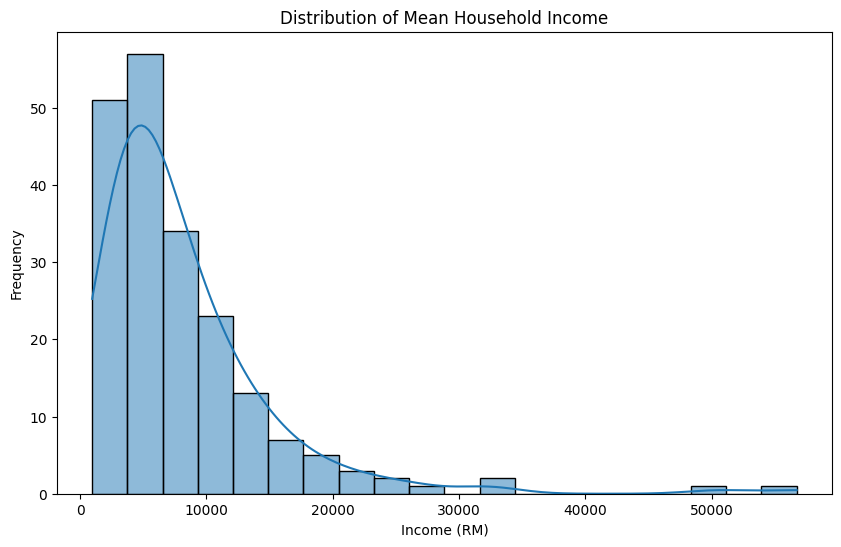

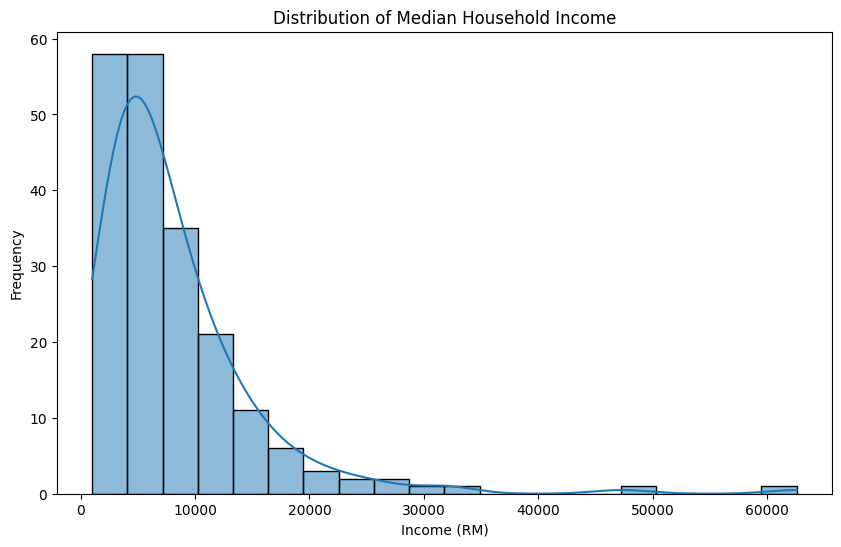

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('cdata.csv')

# Filter data for 'mean' income
df_mean = df[df['variable'] == 'mean']

# Filter data for 'median' income
df_median = df[df['variable'] == 'median']

# Plotting the distribution of mean income
plt.figure(figsize=(10, 6))
sns.histplot(df_mean['income'], kde=True, bins=20)
plt.title('Distribution of Mean Household Income')
plt.xlabel('Income (RM)')
plt.ylabel('Frequency')
plt.show()

# Plotting the distribution of median income
plt.figure(figsize=(10, 6))
sns.histplot(df_median['income'], kde=True, bins=20)
plt.title('Distribution of Median Household Income')
plt.xlabel('Income (RM)')
plt.ylabel('Frequency')
plt.show()

These visualizations will provide insights into the overall spread of income levels and how they may vary between the mean and median values.

Visualizing Trends Over Time

To explore how household income has changed over time, we can plot the mean and median income against the year. This will help us observe long-term trends and identify any significant shifts or patterns.

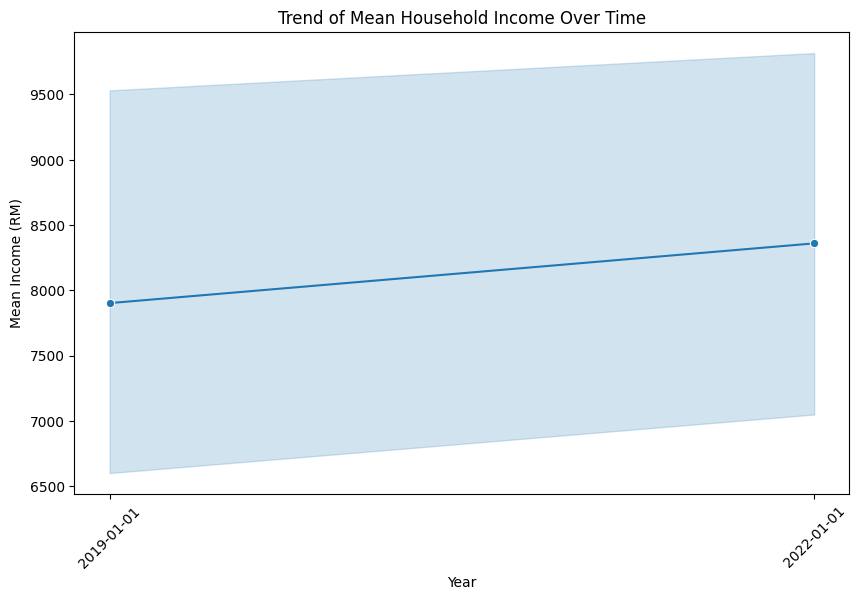

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
df = pd.read_csv('cdata.csv')

# Filter data for 'mean' income
df_mean = df[df['variable'] == 'mean']

# Filter data for 'median' income
df_median = df[df['variable'] == 'median']

# Plotting trends of mean income over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='income', data=df_mean, marker='o')
plt.title('Trend of Mean Household Income Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Income (RM)')
plt.xticks(rotation=45)
plt.show()


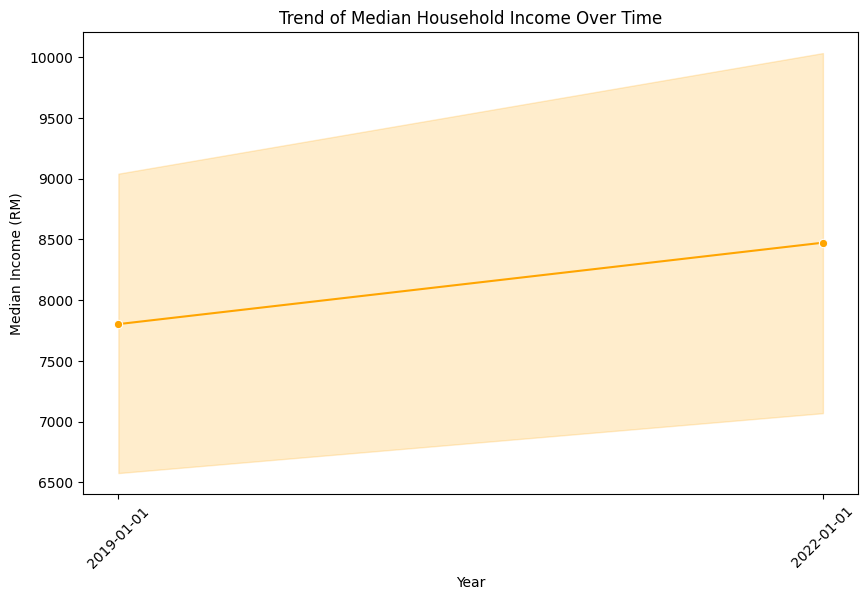

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
df = pd.read_csv('cdata.csv')

# Plotting trends of median income over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='income', data=df_median, marker='o', color='orange')
plt.title('Trend of Median Household Income Over Time')
plt.xlabel('Year')
plt.ylabel('Median Income (RM)')
plt.xticks(rotation=45)
plt.show()

Identifying Correlations and Relationships

Exploring correlations between income levels and other variables can reveal potential relationships. We can use a correlation matrix and pair plots to assess how different income percentiles correlate with each other or with the overall income trends.

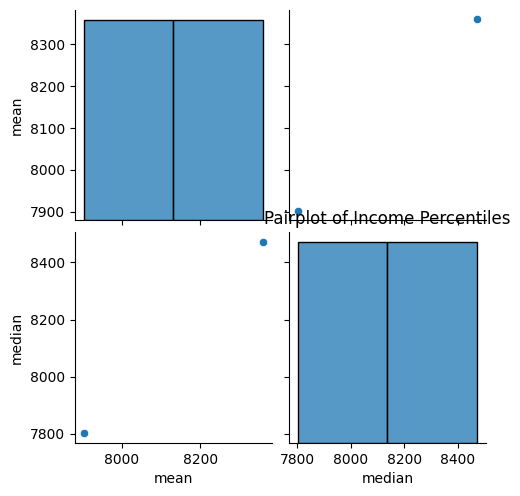

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
df = pd.read_csv('cdata.csv')

# Filter for relevant income variables (add more if available)
df_income = df[df['variable'].isin(['mean', 'median', 'income_10th', 'income_90th'])]

# Aggregate the data by date and variable (taking the mean of 'income' where duplicates exist)
df_income_agg = df_income.groupby(['date', 'variable'], as_index=False)['income'].mean()

# Pivot the data for pairplot (making it in wide format)
df_income_pivoted = df_income_agg.pivot(index='date', columns='variable', values='income')

# Plotting the pairplot
sns.pairplot(df_income_pivoted)
plt.title('Pairplot of Income Percentiles')
plt.show()


PCA for Dimensionality Reduction

Principal Component Analysis (PCA) can be used to reduce dimensionality and find the most significant components. This can help in further exploring how different features collectively impact income trends.

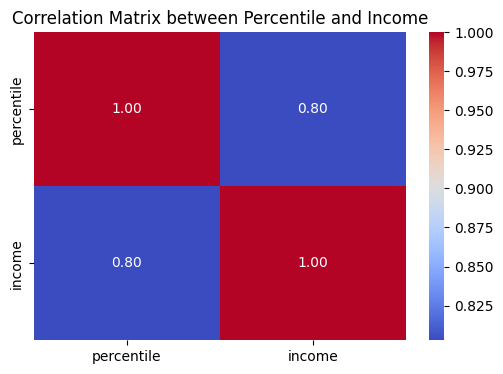

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
df = pd.read_csv('cdata.csv')

# Select only the 'percentile' and 'income' columns for correlation
df_percentile_income = df[['percentile', 'income']]

# Calculate the correlation matrix
correlation_matrix = df_percentile_income.corr()

# Plotting the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix between Percentile and Income')
plt.show()


visualize any anomalies

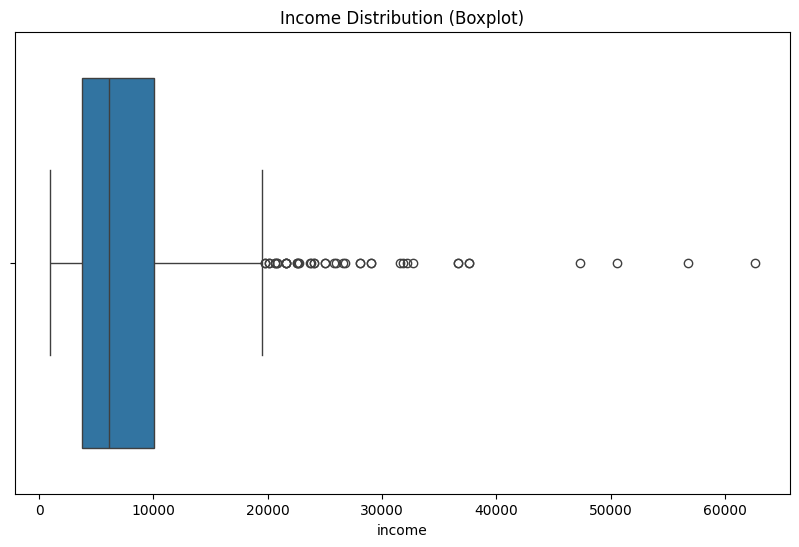

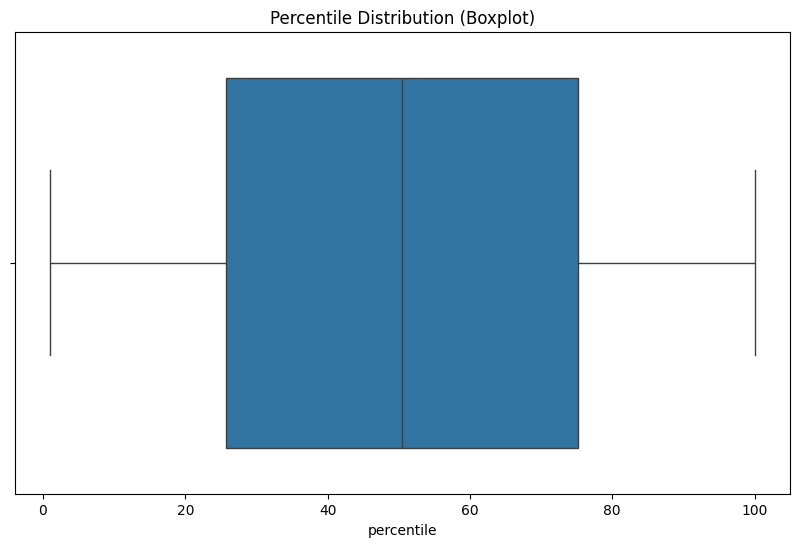

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the cleaned data
df = pd.read_csv('cdata.csv')

# Plotting distribution of income to check for extreme outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['income'])
plt.title('Income Distribution (Boxplot)')
plt.show()

# Plotting distribution of percentiles
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['percentile'])
plt.title('Percentile Distribution (Boxplot)')
plt.show()

# PCA-Based Analysis of Feature Importance

# Train and split

 creating and training a linear regression model using the training data (X_train and y_train). Predictions are made on both the training set and the test set (X_train and X_test). The model's performance is then evaluated using the R-squared (R2) score and Mean Squared Error (MSE) for both sets. These metrics help assess how well the model fits the training data and generalizes to the unseen test data.

Additionally, 5-fold cross-validation is performed on the training set to provide a more robust estimate of the model's performance, with individual cross-validation scores and the mean R2 score printed. This step ensures that the model’s performance is consistent and not overfitting to any particular subset of the data.

Finally, the code will print the evaluation results, allowing the user to review the model's performance metrics before proceeding with any further analysis.

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('cdata.csv')

# Assuming 'income' is the target variable, and other columns are features (excluding 'date' and 'percentile')
X = df.drop(columns=['income', 'date', 'percentile'])
y = df['income']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save the splits to separate CSV files
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Confirm that the split has been completed
print("Train-test split completed and saved to CSV files.")


Train-test split completed and saved to CSV files.


# Linear Regression

In [52]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

# Load the cleaned dataset
file_path = 'cdata.csv'
df = pd.read_csv(file_path)

# Prepare the feature matrix (X) and target vector (y)
# For simplicity, we assume 'percentile' and 'variable' are features, and 'income' is the target
X = df[['percentile']]  # You can include more features here if necessary
y = df['income']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_pred_train = linear_model.predict(X_train)
y_pred_test = linear_model.predict(X_test)

# Evaluate the model's performance
train_r2 = r2_score(y_train, y_pred_train)
train_mse = mean_squared_error(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)

# Print performance metrics
print(f'Train set R2 score: {train_r2}')
print(f'Train set Mean Squared Error: {train_mse}')
print(f'Test set R2 score: {test_r2}')
print(f'Test set Mean Squared Error: {test_mse}')

# Perform 5-fold cross-validation on the training set
cv_scores_linear = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='r2')

# Print cross-validation scores and the mean score
print(f'Cross-validation scores for Linear Regression: {cv_scores_linear}')
print(f'Mean cross-validation R2 score for Linear Regression: {cv_scores_linear.mean()}')



Train set R2 score: 0.6382337248134633
Train set Mean Squared Error: 15227991.285604814
Test set R2 score: 0.6589021725016865
Test set Mean Squared Error: 18512047.468214266
Cross-validation scores for Linear Regression: [0.65600358 0.73201284 0.54865618 0.73554115 0.59148393]
Mean cross-validation R2 score for Linear Regression: 0.6527395366125106


# Linear Regression with PCA

In [54]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the cleaned dataset
file_path = 'cdata.csv'  # Make sure to replace with your file path
df = pd.read_csv(file_path)

# Prepare the feature matrix (X) and target vector (y)
X = df[['percentile']]  # You can add more features here if necessary
y = df['income']

# First, we standardize the data before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to the data
pca = PCA(n_components=1)  # Use 1 principal component for simplicity, you can adjust this
X_pca = pca.fit_transform(X_scaled)

# Split the PCA-transformed data into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Create and train the linear regression model with PCA
linear_model_pca = LinearRegression()
linear_model_pca.fit(X_train_pca, y_train)

# Make predictions on the PCA training and testing sets
y_pred_train_pca = linear_model_pca.predict(X_train_pca)
y_pred_test_pca = linear_model_pca.predict(X_test_pca)

# Evaluate the model's performance for Linear Regression with PCA
train_r2_pca = r2_score(y_train, y_pred_train_pca)
train_mse_pca = mean_squared_error(y_train, y_pred_train_pca)
test_r2_pca = r2_score(y_test, y_pred_test_pca)
test_mse_pca = mean_squared_error(y_test, y_pred_test_pca)

print(f"Linear Regression with PCA - Train set R2 score: {train_r2_pca}")
print(f"Linear Regression with PCA - Train set Mean Squared Error: {train_mse_pca}")
print(f"Linear Regression with PCA - Test set R2 score: {test_r2_pca}")
print(f"Linear Regression with PCA - Test set Mean Squared Error: {test_mse_pca}")

# Perform 5-fold cross-validation on the training set for Linear Regression with PCA
cv_scores_linear_pca = cross_val_score(linear_model_pca, X_train_pca, y_train, cv=5, scoring='r2')
print(f'Linear Regression with PCA - Cross-validation scores: {cv_scores_linear_pca}')
print(f'Linear Regression with PCA - Mean cross-validation R2 score: {cv_scores_linear_pca.mean()}')


Linear Regression with PCA - Train set R2 score: 0.6382337248134631
Linear Regression with PCA - Train set Mean Squared Error: 15227991.285604816
Linear Regression with PCA - Test set R2 score: 0.6589021725016866
Linear Regression with PCA - Test set Mean Squared Error: 18512047.468214266
Linear Regression with PCA - Cross-validation scores: [0.65600358 0.73201284 0.54865618 0.73554115 0.59148393]
Linear Regression with PCA - Mean cross-validation R2 score: 0.6527395366125106
